In [156]:
#import des modules 

import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
from math import pow
from scipy.ndimage import convolve
from skimage.restoration import denoise_tv_chambolle,wiener
from skimage.metrics import mean_squared_error
from skimage.color import rgb2gray
from skimage.morphology import disk
from skimage.filters import sobel

C:\Users\mouad\AppData\Local\Temp\ipykernel_5312\3705298358.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image=rgb2gray(image)


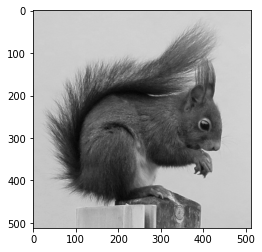

In [159]:
image=io.imread('squirrel.png')
image=rgb2gray(image)
plt.imshow(image,cmap='gray')
plt.show()

In [13]:
image.shape # la taille de l image correspond au besoin

(512, 512)

In [ ]:
#puissance du signal origine


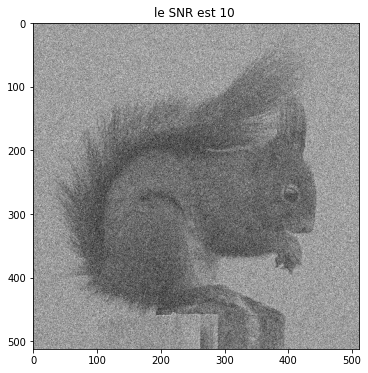

In [160]:
image_f=image.astype('float32')

#puissance du signal origine
signal=image.ravel()
puissance_signal=(np.linalg.norm(image,ord=None, axis=None))**2/(image.shape[0]*image.shape[1])#norme deux du vecteur signal
SNR=10
var_=puissance_signal*pow(10,-SNR/10)
image_rd=random_noise(image_f,mode='gaussian',var=var_,clip=False)
plt.figure(figsize=(6,6))
plt.title(f'le SNR est {SNR} ')
plt.imshow(image_rd,'gray')
plt.show()



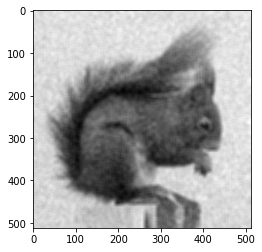

In [15]:
w=10
h = np.ones((w,w)) / (w*w) # c est le mask moyenneur 

conv=convolve(image_rd,h)#produit convulution


plt.imshow(conv,'gray')
plt.show()

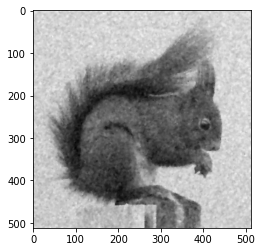

In [162]:
image_denoised=denoise_tv_chambolle(image_rd, weight=50)
plt.imshow(image_denoised,'gray')
plt.show()


In [17]:
MSE=mean_squared_error(image_denoised,image)
MSE_=mean_squared_error(conv,image)
print(f'l erreur moyenne quadratique pour la TV regulization {MSE}')
print(f'l erreur quadratique moyenne de la deuxième methode est de {MSE_}')

#au sens de l erreur quadratique moyenne la TV regulization est meilleur que celle du moyenneur

l erreur moyenne quadratique pour la TV regulization 1948.261428476261
l erreur quadratique moyenne de la deuxième methode est de 83.22129615201668


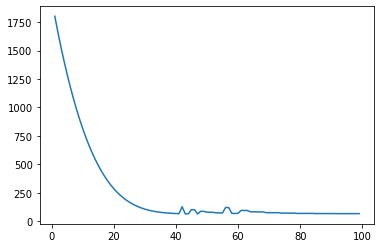

In [169]:
#window_size=np.linspace(2,50)
T_=[]
for w in range(1,100) :
    img=denoise_tv_chambolle(image_rd, weight=w)
    mse=mean_squared_error(img,image)
    T_.append(mse)
plt.plot([i for i in range(1,100)],T_)
plt.show()

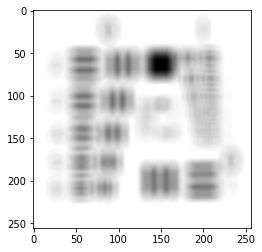

In [124]:
#loading an image 

x=io.imread('5.1.13.tiff')

cercle=disk(10)
taille=np.sum(cercle)
cercle=cercle/taille

y=convolve(x.astype(float),cercle,mode="wrap")

plt.imshow(y,'gray')

In [79]:
print(y.max())

255.0000000000015


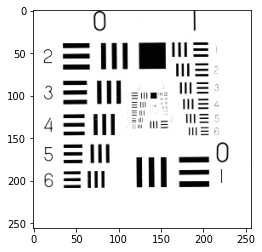

In [80]:
fft_signal = np.fft.fft2(y)

fft_h=np.fft.fft2(cercle,s=(y.shape[0],y.shape[1]))

estimate=fft_signal/fft_h

signal_estimate = np.fft.ifft2(estimate)

filtered_signal = np.real(signal_estimate)

plt.imshow(filtered_signal,'gray')



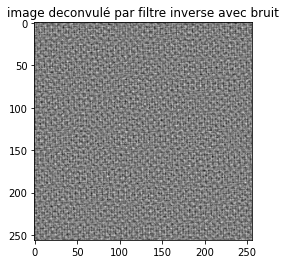

In [151]:
y_=random_noise(x.astype(float),mode='gaussian',var=0.0001,clip=False)


fft_signal_ = np.fft.fft2(y_)

fft_h=np.fft.fft2(cercle,s=(y_.shape[0],y_.shape[1]))

estimate=fft_signal_/fft_h

signal_estimate_ = np.fft.ifft2(estimate)

filtered_signal_ = np.real(signal_estimate_)

plt.imshow(filtered_signal_,'gray')
plt.title('image deconvulé par filtre inverse avec bruit')
plt.show()

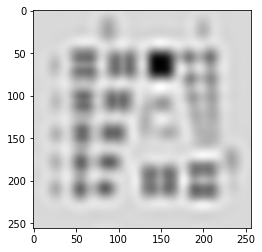

In [165]:
wienr_fil=wiener(y_,cercle,balance=50,clip=False)
plt.imshow(wienr_fil,'gray')

In [150]:
cuttof_frequency=50
mask=np.zeros_like(image)
mask[fft_h.all()>cuttof_frequency]=1


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)